<a href="https://colab.research.google.com/github/eduardopadilla3/DS-Unit-4-Sprint-1-NLP/blob/main/module1-text-data/EP_DS_421_Text_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

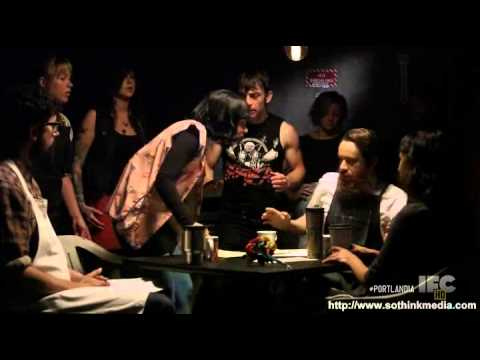

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/content'

In [1]:
# Dependencies for the week (instead of conda)
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/requirements.txt
!pip install -r requirements.txt

--2020-09-29 13:29:17--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137 [text/plain]
Saving to: ‘requirements.txt.3’

requirements.txt.3  100%[===================>]     137  --.-KB/s    in 0s      

2020-09-29 13:29:17 (11.5 MB/s) - ‘requirements.txt.3’ saved [137/137]



In [2]:
!python3 -m spacy download en_core_web_md

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [4]:
pip install -U spacy==2.2.2

     |████████████████████████████████| 10.3MB 2.3MB/s 
  Using cached https://files.pythonhosted.org/packages/07/59/6bb553bc9a5f072d3cd479fc939fea0f6f682892f1f5cff98de5c9b615bb/thinc-7.3.1-cp36-cp36m-manylinux1_x86_64.whl
  Found existing installation: thinc 7.1.1
    Uninstalling thinc-7.1.1:
      Successfully uninstalled thinc-7.1.1
  Found existing installation: spacy 2.2.0
    Uninstalling spacy-2.2.0:
      Successfully uninstalled spacy-2.2.0


In [5]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_md")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [7]:
#Clean columns
shops['star_rating'] = shops['star_rating'].str[1].astype(float)
shops['full_review_text'] = shops['full_review_text'].str[11:]


In [8]:
def clean(column):
  column = re.sub('[^a-zA-Z 0-9]', '', column)
  return column

shops['full_review_text'] = shops['full_review_text'].apply(clean)


In [9]:
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,1 checkin Love love loved the atmosphere Ever...,5.0
1,The Factory - Cafe With a Soul,Listed in Date Night Austin Ambiance in Austin...,4.0
2,The Factory - Cafe With a Soul,1 checkin Listed in Brunch Spots I loved the ...,4.0
3,The Factory - Cafe With a Soul,Very cool decor Good drinks Nice seating How...,2.0
4,The Factory - Cafe With a Soul,1 checkin They are located within the Northcro...,4.0


In [10]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
  
    
    return tokens

In [11]:
shops['tokens'] = shops['full_review_text'].apply(tokenize)

In [12]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens
0,The Factory - Cafe With a Soul,1 checkin Love love loved the atmosphere Ever...,5.0,"[1, checkin, love, love, loved, the, atmospher..."
1,The Factory - Cafe With a Soul,Listed in Date Night Austin Ambiance in Austin...,4.0,"[listed, in, date, night, austin, ambiance, in..."
2,The Factory - Cafe With a Soul,1 checkin Listed in Brunch Spots I loved the ...,4.0,"[1, checkin, listed, in, brunch, spots, i, lov..."
3,The Factory - Cafe With a Soul,Very cool decor Good drinks Nice seating How...,2.0,"[very, cool, decor, good, drinks, nice, seatin..."
4,The Factory - Cafe With a Soul,1 checkin They are located within the Northcro...,4.0,"[1, checkin, they, are, located, within, the, ..."


In [13]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [14]:
# Use the Function
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
33,the,6844,34754,1.0,0.044947,0.044947,0.898634
14,and,6864,26650,2.0,0.034466,0.079413,0.901261
29,a,6244,22746,3.0,0.029417,0.108830,0.819853
1,i,5505,20097,4.0,0.025991,0.134821,0.722820
38,to,5653,17163,5.0,0.022197,0.157017,0.742253


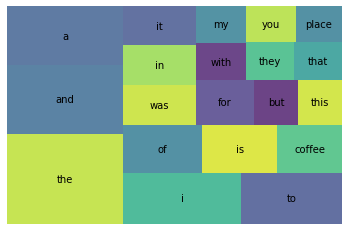

In [15]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [16]:
# Spacy's Default Stop Words
nlp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [18]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_md")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [19]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) and (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [20]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens
0,The Factory - Cafe With a Soul,1 checkin Love love loved the atmosphere Ever...,5.0,"[ , 1, checkin, love, love, loved, atmosphere,..."
1,The Factory - Cafe With a Soul,Listed in Date Night Austin Ambiance in Austin...,4.0,"[listed, date, night, austin, ambiance, austin..."
2,The Factory - Cafe With a Soul,1 checkin Listed in Brunch Spots I loved the ...,4.0,"[ , 1, checkin, listed, brunch, spots, loved, ..."
3,The Factory - Cafe With a Soul,Very cool decor Good drinks Nice seating How...,2.0,"[ , cool, decor, good, drinks, nice, seating, ..."
4,The Factory - Cafe With a Soul,1 checkin They are located within the Northcro...,4.0,"[1, checkin, located, northcross, mall, shoppi..."


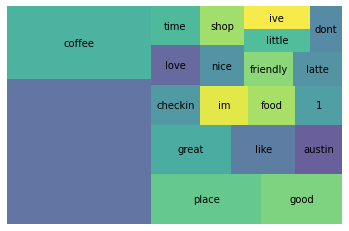

In [21]:
wc = count(shops['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [22]:
STOP_WORDS = nlp.Defaults.stop_words.union([' ', 'checkin', 'service', 'dont','1', '-', 'austin', 'Austin', 'it', 'im', 'ive'])

In [23]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

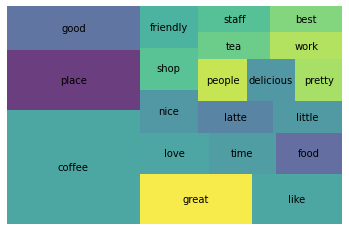

In [24]:
wc = count(shops['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [25]:
# Wrap it all in a function
def get_lemmas(text):
    STOP_WORDS = nlp.Defaults.stop_words.union([' ', 'checkin', 'service', 'dont','1', '-', 'austin', 'Austin', 'it', 'im', 'ive', 'place', 'coffee', ''])

    lemmas = []
    doc = nlp(text)  # Spacy does all the work! It does take awhile...
    
    for token in doc: 
        if ((token.text.lower() not in STOP_WORDS) and (token.is_stop == False) and (token.is_punct == False) and (token.pos_ != 'PRON')):
            lemmas.append(token.lemma_)
    
    return lemmas

In [26]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

In [27]:
shops['lemmas'].head()

0    [Love, love, love, atmosphere, corner, shop, s...
1    [list, Date, Night, Ambiance, BEAUTIFUL, Love,...
2    [list, Brunch, Spots, love, eclectic, homey, p...
3    [cool, decor, good, drink, nice, seating, over...
4    [locate, Northcross, mall, shopping, center, f...
Name: lemmas, dtype: object

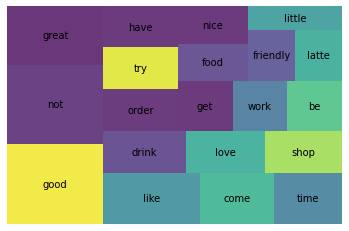

In [28]:
wc = count(shops['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [29]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens,lemmas
0,The Factory - Cafe With a Soul,1 checkin Love love loved the atmosphere Ever...,5.0,"[love, love, loved, atmosphere, corner, coffee...","[Love, love, love, atmosphere, corner, shop, s..."
1,The Factory - Cafe With a Soul,Listed in Date Night Austin Ambiance in Austin...,4.0,"[listed, date, night, ambiance, beautiful, lov...","[list, Date, Night, Ambiance, BEAUTIFUL, Love,..."
2,The Factory - Cafe With a Soul,1 checkin Listed in Brunch Spots I loved the ...,4.0,"[listed, brunch, spots, loved, eclectic, homey...","[list, Brunch, Spots, love, eclectic, homey, p..."
3,The Factory - Cafe With a Soul,Very cool decor Good drinks Nice seating How...,2.0,"[cool, decor, good, drinks, nice, seating, ove...","[cool, decor, good, drink, nice, seating, over..."
4,The Factory - Cafe With a Soul,1 checkin They are located within the Northcro...,4.0,"[located, northcross, mall, shopping, center, ...","[locate, Northcross, mall, shopping, center, f..."


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [30]:
overall_wc = count(shops['lemmas'])
overall_wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
145,good,3519,5236,1.0,0.015169,0.015169,0.462054
96,not,3052,5159,2.0,0.014946,0.030114,0.400735
71,great,2774,3813,3.0,0.011046,0.041161,0.364233
162,like,2258,3350,4.0,0.009705,0.050866,0.296481
407,come,1917,2608,5.0,0.007555,0.058421,0.251707


In [35]:
bad_shops = shops.query('star_rating <= 3')
good_shops = shops.query('star_rating > 3')

In [36]:
good_shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens,lemmas
0,The Factory - Cafe With a Soul,1 checkin Love love loved the atmosphere Ever...,5.0,"[love, love, loved, atmosphere, corner, coffee...","[Love, love, love, atmosphere, corner, shop, s..."
1,The Factory - Cafe With a Soul,Listed in Date Night Austin Ambiance in Austin...,4.0,"[listed, date, night, ambiance, beautiful, lov...","[list, Date, Night, Ambiance, BEAUTIFUL, Love,..."
2,The Factory - Cafe With a Soul,1 checkin Listed in Brunch Spots I loved the ...,4.0,"[listed, brunch, spots, loved, eclectic, homey...","[list, Brunch, Spots, love, eclectic, homey, p..."
4,The Factory - Cafe With a Soul,1 checkin They are located within the Northcro...,4.0,"[located, northcross, mall, shopping, center, ...","[locate, Northcross, mall, shopping, center, f..."
5,The Factory - Cafe With a Soul,1 checkin Very cute cafe I think from the mom...,4.0,"[cute, cafe, think, moment, stepped, wasnt, di...","[cute, cafe, think, moment, step, not, not, fi..."


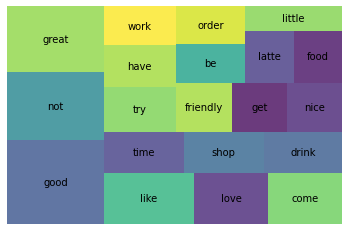

In [42]:
wc_good = count(good_shops['lemmas'])

wc_top20_good = wc_good[wc_good['rank'] <= 20]

squarify.plot(sizes=wc_top20_good['pct_total'], label=wc_top20_good['word'], alpha=.8 )
plt.axis('off')
plt.show()

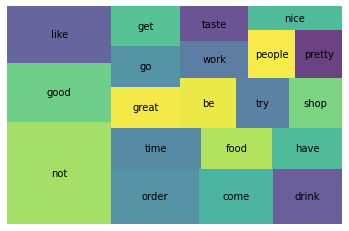

In [43]:
wc_bad = count(bad_shops['lemmas'])

wc_top20_bad = wc_bad[wc_bad['rank'] <= 20]

squarify.plot(sizes=wc_top20_bad['pct_total'], label=wc_top20_bad['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [44]:
top10_good = wc_good[wc_good['rank'] <=10]
top10_bad = wc_bad[wc_bad['rank'] <=10]

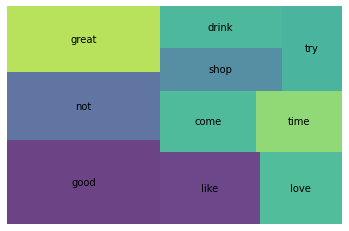

In [48]:
#good
squarify.plot(sizes=top10_good['pct_total'], label=top10_good['word'], alpha=.8 )
plt.axis('off')
plt.show()

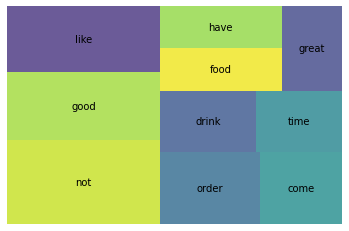

In [49]:
#bad
squarify.plot(sizes=top10_good['pct_total'], label=top10_bad['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

